<a href="https://colab.research.google.com/github/ldselvera/Bi-LSTM-question-classifier/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from collections import defaultdict
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import linear_model
# import eli5

import os

In [ ]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

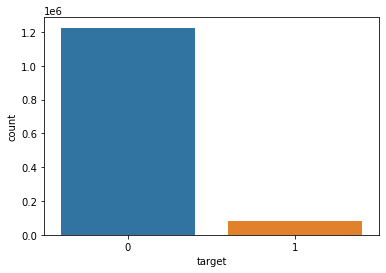

In [ ]:
sns.countplot(train['target'])

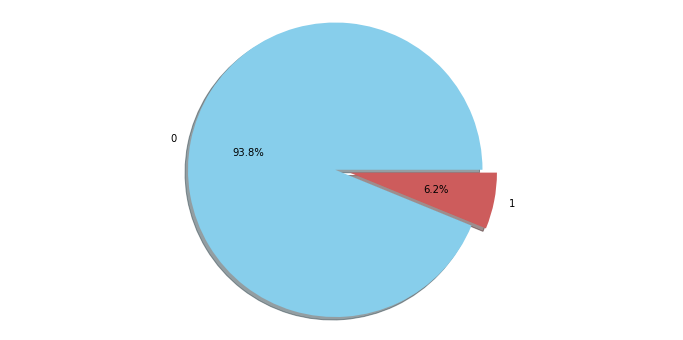

In [ ]:
temp = train['target'].value_counts(normalize=True).reset_index()

colors = ["skyblue", "indianred"]
explode = (0.05, 0.05)
 
plt.pie(temp['target'], explode=explode, labels=temp['index'], colors=colors,autopct='%1.1f%%', shadow=True, startangle=0)
 
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.rcParams['font.size'] = 20
plt.axis('equal')
plt.show()

In [ ]:
def ngram_extractor(text, n_gram):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# Function to generate a dataframe with n_gram and top max_row frequencies
def generate_ngrams(df, col, n_gram, max_row):
    temp_dict = defaultdict(int)
    for question in df[col]:
        for word in ngram_extractor(question, n_gram):
            temp_dict[word] += 1
    temp_df = pd.DataFrame(sorted(temp_dict.items(), key=lambda x: x[1])[::-1]).head(max_row)
    temp_df.columns = ["word", "wordcount"]
    return temp_df

def comparison_plot(df_1,df_2,col_1,col_2, space):
    fig, ax = plt.subplots(1, 2, figsize=(20,10))
    
    sns.barplot(x=col_2, y=col_1, data=df_1, ax=ax[0], color="skyblue")
    sns.barplot(x=col_2, y=col_1, data=df_2, ax=ax[1], color="indianred")

    ax[0].set_xlabel('Word count', size=14, color="black")
    ax[0].set_ylabel('Words', size=14, color="black")
    ax[0].set_title('Top words in accepted questions', size=18, color="black")

    ax[1].set_xlabel('Word count', size=14, color="black")
    ax[1].set_ylabel('Words', size=14, color="black")
    ax[1].set_title('Top words in improper questions', size=18, color="black")

    fig.subplots_adjust(wspace=space)
    
    plt.show()

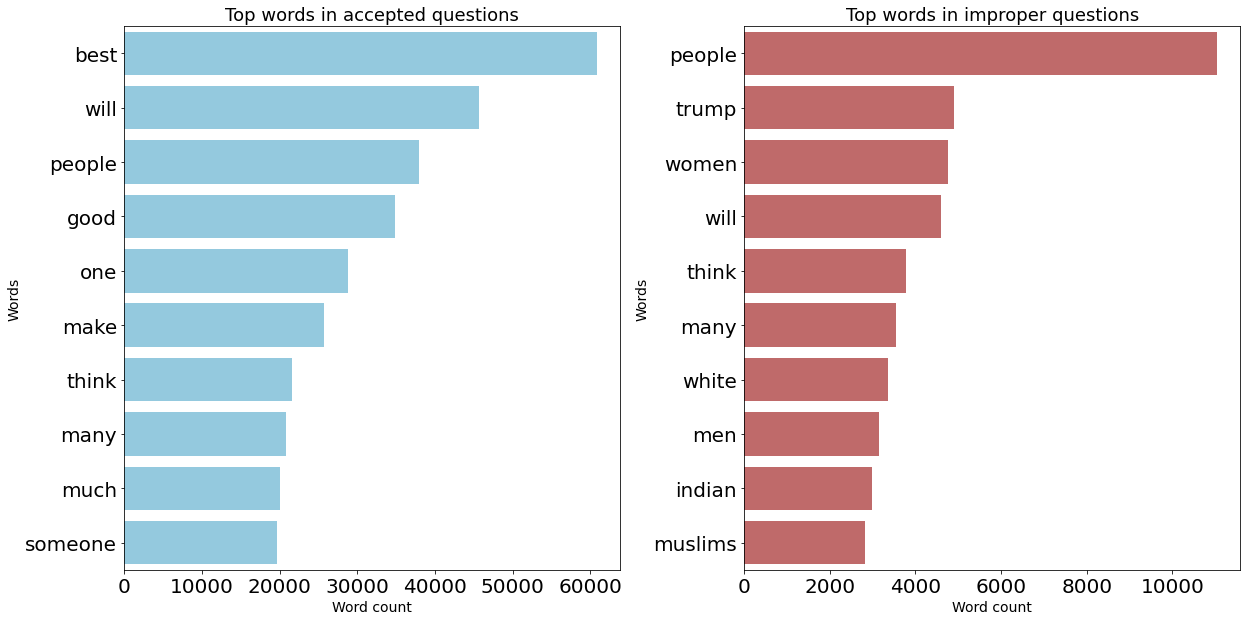

In [ ]:
sincere_1gram = generate_ngrams(train[train["target"]==0], 'question_text', 1, 10)
insincere_1gram = generate_ngrams(train[train["target"]==1], 'question_text', 1, 10)

comparison_plot(sincere_1gram,insincere_1gram,'word','wordcount', 0.25)

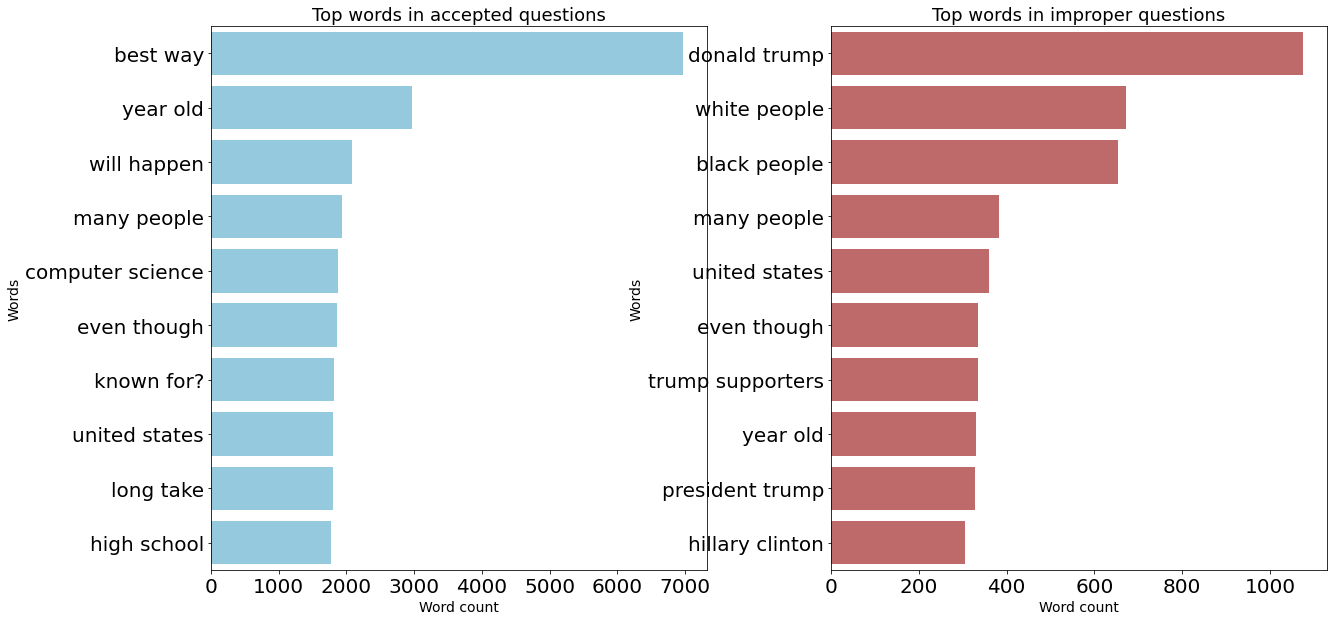

In [ ]:
sincere_2gram = generate_ngrams(train[train["target"]==0], 'question_text', 2, 10)
insincere_2gram = generate_ngrams(train[train["target"]==1], 'question_text', 2, 10)

comparison_plot(sincere_2gram,insincere_2gram,'word','wordcount', 0.25)

In [ ]:
#Code sourced from : https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc

#import the wordcloud package
from wordcloud import WordCloud, STOPWORDS

#Define the word cloud function with a max of 200 words
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    #define additional stop words that are not contained in the dictionary
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)
    #Generate the word cloud
    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    #set the plot parameters
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

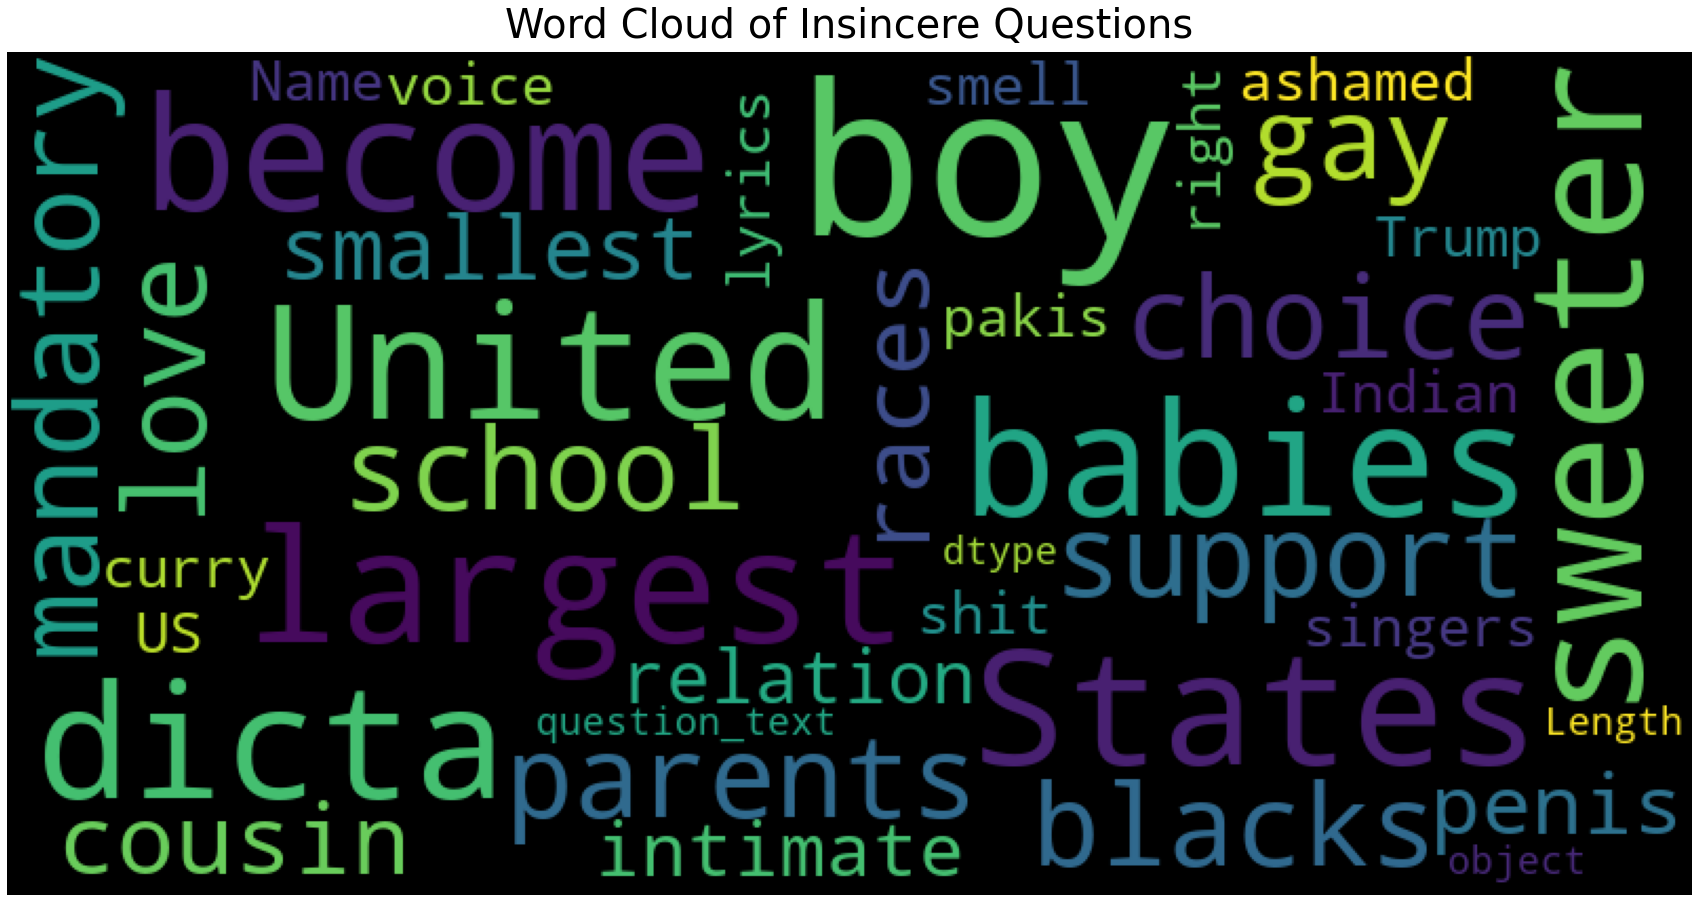

In [ ]:
#Select insincere questions from training dataset
insincere = train.loc[train['target'] == 1]
#run the function on the insincere questions
plot_wordcloud(insincere["question_text"], title="Word Cloud of Insincere Questions")

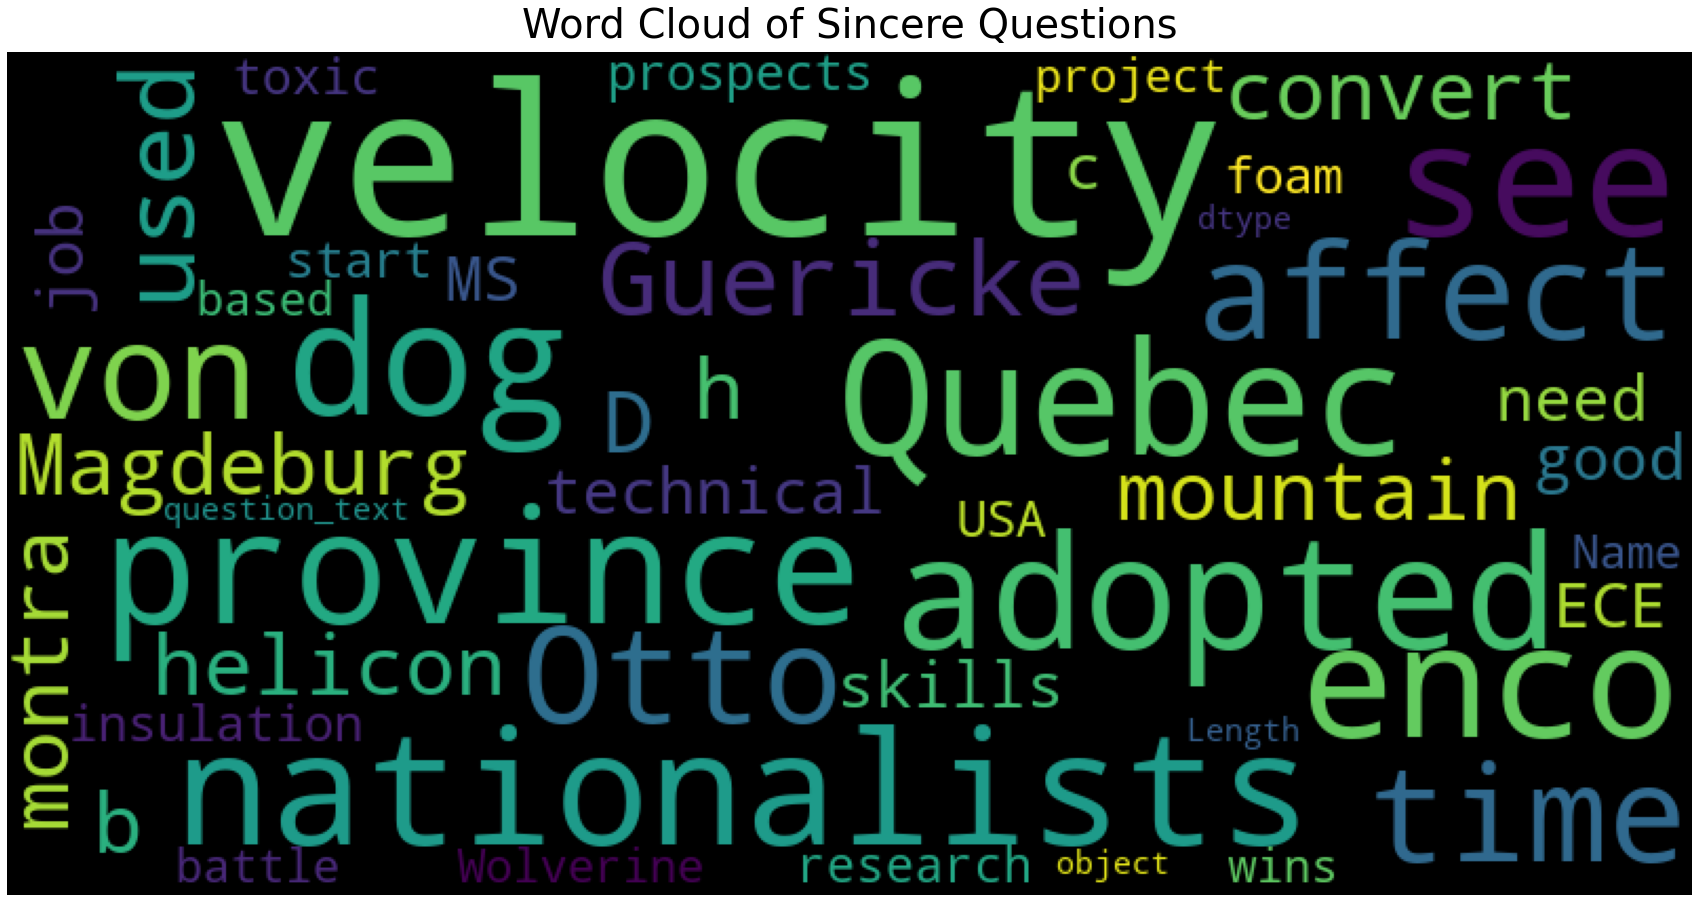

In [ ]:
#Select sincere questions from training dataset
sincere = train.loc[train['target'] == 0]
#run the function on the insincere questions
plot_wordcloud(sincere["question_text"], title="Word Cloud of Sincere Questions")